# Carga del documento

In [ ]:
!wget --no-cache -O init.py -q https://raw.githubusercontent.com/rramosp/ai4eng.v1/main/content/init.py
import init; init.init(force_download=False); init.get_weblink()

## Descargar datos directamente desde Kaggle

- Crear un archivo `kaggle.json` con su token de autenticación
- Create a file `kaggle.json` with your authentication token (En kaggle $\to$ haga clic en el icono de usuario en la parte superior derecha $\to$ settings $\to$ API create new token)
- Subirlo a este espacio de trabajo portátil
- Ejecutar la siguiente celda

In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = '.'
!chmod 600 ./kaggle.json
!kaggle competitions download -c udea-ai4eng-20242

udea-ai4eng-20242.zip: Skipping, found more recently modified local copy (use --force to force download)


## Descomprimir e inspeccionar datos

In [ ]:
!unzip udea*.zip > /dev/null

replace submission_example.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: N


In [ ]:
!wc *.csv

   296787    296787   4716673 submission_example.csv
   296787   4565553  50135751 test.csv
   692501  10666231 118025055 train.csv
  1286075  15528571 172877479 total


## Cargar datos `train.csv` con pandas



In [ ]:
import pandas as pd
import numpy as np

z = pd.read_csv("train.csv")
print ("shape of loaded dataframe", z.shape)
test = pd.read_csv("test.csv")
print ("shape of loaded dataframe", test.shape)

shape of loaded dataframe (692500, 12)
shape of loaded dataframe (296786, 12)


In [ ]:
z.head()

,ID,PERIODO,ESTU_PRGM_ACADEMICO,ESTU_PRGM_DEPARTAMENTO,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,FAMI_EDUCACIONPADRE,FAMI_EDUCACIONMADRE,ESTU_PAGOMATRICULAPROPIO,RENDIMIENTO_GLOBAL
0,904256,20212,ENFERMERIA,BOGOTÁ,Entre 5.5 millones y menos de 7 millones,Menos de 10 horas,Estrato 3,Si,Técnica o tecnológica incompleta,Postgrado,No,medio-alto
1,645256,20212,DERECHO,ATLANTICO,Entre 2.5 millones y menos de 4 millones,0,Estrato 3,No,Técnica o tecnológica completa,Técnica o tecnológica incompleta,No,bajo
2,308367,20203,MERCADEO Y PUBLICIDAD,BOGOTÁ,Entre 2.5 millones y menos de 4 millones,Más de 30 horas,Estrato 3,Si,Secundaria (Bachillerato) completa,Secundaria (Bachillerato) completa,No,bajo
3,470353,20195,ADMINISTRACION DE EMPRESAS,SANTANDER,Entre 4 millones y menos de 5.5 millones,0,Estrato 4,Si,No sabe,Secundaria (Bachillerato) completa,No,alto
4,989032,20212,PSICOLOGIA,ANTIOQUIA,Entre 2.5 millones y menos de 4 millones,Entre 21 y 30 horas,Estrato 3,Si,Primaria completa,Primaria completa,No,medio-bajo


# Información general



considering that we have in total 692K data items, we have realatively few missing values on each column

In [ ]:
z.isna().sum()

,0
ID,0
PERIODO,0
ESTU_PRGM_ACADEMICO,0
ESTU_PRGM_DEPARTAMENTO,0
ESTU_VALORMATRICULAUNIVERSIDAD,6287
ESTU_HORASSEMANATRABAJA,30857
FAMI_ESTRATOVIVIENDA,32137
FAMI_TIENEINTERNET,26629
FAMI_EDUCACIONPADRE,23178
FAMI_EDUCACIONMADRE,23664


In [ ]:
z.dtypes

,0
ID,int64
PERIODO,int64
ESTU_PRGM_ACADEMICO,object
ESTU_PRGM_DEPARTAMENTO,object
ESTU_VALORMATRICULAUNIVERSIDAD,object
ESTU_HORASSEMANATRABAJA,object
FAMI_ESTRATOVIVIENDA,object
FAMI_TIENEINTERNET,object
FAMI_EDUCACIONPADRE,object
FAMI_EDUCACIONMADRE,object


# Revisión de columnas

## Periodo

Posibilidades:

* Se puede separar el año del periodo en dos columnas y trabajarlo en numeros(Recomendado por el Profe) o como etiquetas.
* Trabajar los periodos como etiquetas o numeros.

Nota: Trabarla como etiquetas no nos permitiria predecir cosas que esten por fuera de esos periodos. Puede ser util para que el modelo tenga más capacidad de predecir los valores del test(Y sacar un mejor Acurracy), pero podria generar un sobre ajuste.

In [ ]:
sorted(z.PERIODO.unique())

[20183, 20184, 20194, 20195, 20196, 20202, 20203, 20212, 20213]

In [ ]:
sorted(test.PERIODO.unique())

[20183, 20184, 20194, 20195, 20196, 20202, 20203, 20212, 20213]

### Tratamiendo de columna: Eliminación

In [ ]:
z = z.drop(columns=['PERIODO'])

In [ ]:
z.head()

,ID,ESTU_PRGM_ACADEMICO,ESTU_PRGM_DEPARTAMENTO,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,FAMI_EDUCACIONPADRE,FAMI_EDUCACIONMADRE,ESTU_PAGOMATRICULAPROPIO,RENDIMIENTO_GLOBAL
0,904256,ENFERMERIA,BOGOTÁ,Entre 5.5 millones y menos de 7 millones,Menos de 10 horas,Estrato 3,Si,Técnica o tecnológica incompleta,Postgrado,No,medio-alto
1,645256,DERECHO,ATLANTICO,Entre 2.5 millones y menos de 4 millones,0,Estrato 3,No,Técnica o tecnológica completa,Técnica o tecnológica incompleta,No,bajo
2,308367,MERCADEO Y PUBLICIDAD,BOGOTÁ,Entre 2.5 millones y menos de 4 millones,Más de 30 horas,Estrato 3,Si,Secundaria (Bachillerato) completa,Secundaria (Bachillerato) completa,No,bajo
3,470353,ADMINISTRACION DE EMPRESAS,SANTANDER,Entre 4 millones y menos de 5.5 millones,0,Estrato 4,Si,No sabe,Secundaria (Bachillerato) completa,No,alto
4,989032,PSICOLOGIA,ANTIOQUIA,Entre 2.5 millones y menos de 4 millones,Entre 21 y 30 horas,Estrato 3,Si,Primaria completa,Primaria completa,No,medio-bajo


## Programa Academico

**Importante**: Una posible opción es clasificar las carreras como Ingenieria, Licenciatura, Ciencias Exactas, etc. Son muchas carreras para hacer onehot.



*   El examen tiene areas como matematicas, Lectura Crítica, Sociales y Ciudadanas, ciencias naturales e ingles tal vez eso ayude a predecir.
*   Buscar carreras con una distancia de edicion cortas como posibles carreras duplicadas.
*   (¿Otras ideas?)



In [ ]:
len(sorted(z.ESTU_PRGM_ACADEMICO.unique()))

948

Nota: En este caso decidimos por organizar por tematica principal

In [ ]:
len(z.ESTU_PRGM_ACADEMICO.unique())

948

### Tratamiento de columna: Reducción de etiqueta, mapeo y variable nominal

In [ ]:
import re

In [ ]:
# Function to clean the data, removing accents and special characters and converting to lowercase
def sanitize(text: str):
    accentA = re.compile(r'[áàâãä]'), 'a'
    accentE = re.compile(r'[éèêë]'), 'e'
    accentI = re.compile(r'[íìîï]'), 'i'
    accentO = re.compile(r'[óòôõö]'), 'o'
    accentU = re.compile(r'[úùûü]'), 'u'
    ampersand = re.compile(r'&'), 'y'

    removeSimbols = lambda text: ''.join(re.split(r'[,.:;[\]{}()?¿!¡°\'\"\n_-]', text))
    removeNumbers = lambda text: re.sub(r'\d', '', text)

    removeDoubleSpaces = lambda text: re.sub(r'  ', ' ', text)
    removeBeginSpaces = lambda text: re.sub(r'^\s', '', text)
    accentsToNormal = lambda accent, text: re.sub(accent[0], accent[1], text)
    removeKeywords = lambda keywords, text: re.sub(r'|'.join(keywords), '', text)

    text = text.lower()
    text = removeSimbols(text)
    text = removeNumbers(text)
    text = accentsToNormal(accentA, text)
    text = accentsToNormal(accentE, text)
    text = accentsToNormal(accentI, text)
    text = accentsToNormal(accentO, text)
    text = accentsToNormal(accentU, text)
    text = accentsToNormal(ampersand, text)
    text = removeDoubleSpaces(text)
    text = removeBeginSpaces(text)

    text = removeDoubleSpaces(text)
    text = removeBeginSpaces(text)

    for _ in range(0, 5):
        text = removeDoubleSpaces(text)

    return text
# Edit distance between 2 words
def edit_dist(s1, s2, maxDist = None):
    m, n = len(s1), len(s2)
    prev = 0  # Stores dp[i-1][j-1]
    curr = list(range(n + 1))  # Stores dp[i][j-1] and dp[i][j]

    for i in range(1, m + 1):
        prev = curr[0]
        curr[0] = i

        for j in range(1, n + 1):
            temp = curr[j]
            if s1[i - 1] == s2[j - 1]:
                curr[j] = prev
            else:
                curr[j] = 1 + min(curr[j - 1], prev, curr[j])
            prev = temp

        if maxDist is not None and min(curr) > maxDist:
            return maxDist + 1

    return curr[n]
# Tries to link words that might be the same idea
def absorb(wordsDict, maxDistance):
    words = wordsDict.copy()
    keys = list(words.keys())
    keyCount = len(keys)

    for i in range(keyCount):
        for j in range(i + 1, keyCount):
            dist = edit_dist(keys[i], keys[j], maxDistance)

            if dist <= maxDistance:
                words[keys[i]]['similar'].append(keys[j])
                continue

    return words

In [ ]:
# Dict comprehension to create a dictionary with a unique id for each career and a json object with the career name
data = sorted(z.ESTU_PRGM_ACADEMICO.unique())
data = {i: {'name': career, 'sanitized': sanitize(career), 'same': []} for i, career in enumerate(data)}


In [ ]:
# If the sanitized name is the same for two careers, the careers are the same, then we add the id of the career to the list of the first career with the same sanitized name
for i, career in data.items():
    for j in range(i + 1, len(data)):
        if edit_dist(career['sanitized'], data[j]['sanitized'], 0) <= 0:
            data[i]['same'] = data[i]['same'] + [j]


In [ ]:
def mergeSame(d):
  toRemove = []

  for i, career in d.items():
      hasWork = len(career['same']) != 0
      toUse = []

      while hasWork:
        hasWork = False
        toUse = d[i]['same'][len(toUse) - 1:]

        for rep in toUse:
            if len(d[rep]['same']) != 0:
              hasWork = True
              d[i]['same'] += d[rep]['same']

            toRemove.append(rep)

  for e in toRemove:
      if e in d:
          del d[e]

In [ ]:
mergeSame(data)
print(len(data))

793


In [ ]:
c = 0
for i, career in data.items():
    if len(career['same']) == 0:
        continue

    print(f"{i}: {(career['same'])}")
    c += 1

print(c)

4: [50, 97]
11: [76]
13: [79]
14: [80]
16: [82]
17: [83]
21: [84, 86]
22: [23, 87]
23: [87]
34: [74, 90]
35: [92]
37: [38]
48: [93]
50: [97]
54: [55]
56: [100, 101]
59: [102]
61: [103]
63: [104]
64: [66, 105, 107]
65: [106]
66: [105, 107]
70: [108]
74: [90]
84: [86]
100: [101]
105: [107]
114: [115]
126: [127]
129: [132]
131: [133]
142: [143]
144: [148]
145: [149]
154: [158]
155: [159]
174: [175]
179: [180]
188: [212]
193: [216]
194: [217]
195: [200, 220]
196: [197, 198, 199, 201, 218]
197: [198, 199, 201, 218]
198: [199, 201, 218]
199: [201, 218]
200: [220]
201: [218]
229: [233, 235, 236, 237]
233: [235, 236, 237]
235: [236, 237]
236: [237]
250: [251]
277: [279, 280]
279: [280]
292: [294]
295: [299]
300: [301]
304: [305]
312: [313]
317: [320]
318: [321]
327: [334]
335: [337]
342: [344]
350: [355]
364: [371]
365: [376, 484]
366: [384, 488]
368: [477]
369: [483]
370: [478]
372: [479]
373: [374, 480, 481]
374: [480, 481]
375: [482]
376: [484]
378: [485]
380: [381, 486]
381: [486]
384: [48

In [ ]:
# We generate a dict with each important words of the careers to describe them
# The dict has the word as key and the values are the number of times the word appears in the careers and the number of times the word appears first in the careers
words = {}
meaningless = ['como', 'ocupacional', 'ciclo', 'ciclos', 'para', 'profesional', 'tecnico', 'tecnologo', 'tecnologia', 'tecnologias', 'tecnica', 'tecnologica', 'tecnologicas', 'tecnologicos', 'tecnologico', 'actividad']
for i, career in data.items():
    candidates = career['sanitized'].split(' ')

    for candidate in candidates:
        if candidate in meaningless or len(candidate) <= 3:
            continue

        isCandidateFirst = candidate == candidates[0]

        if candidate not in words:
            baseTotal = len(career['same']) + 1
            baseFirst = baseTotal + 1 if isCandidateFirst else 0
            words[candidate] = {'total': baseTotal, 'first': baseFirst, 'similar': []}

        else:
          words[candidate]['total'] += 1

          if isCandidateFirst:
              words[candidate]['first'] += 1


In [ ]:
# Now we will look all the possible keys that a program can have and only keep the one that is the most popular
# The popular keys will be stored in a separate array, so any key not present in the array will be discarted

toKeep = []
for i, career in data.items():
    candidates = career['sanitized'].split(' ')
    mostPopular = None

    for candidate in candidates:
        if candidate not in words:
            continue

        elif mostPopular is None:
            mostPopular = candidate

        elif words[candidate]['total'] > words[mostPopular]['total']:
            mostPopular = candidate

    toKeep.append(mostPopular)

for key in list(words.keys()):
    if key not in toKeep:
        del words[key]


In [ ]:
len(words)

132

In [ ]:
for candidate in words:
    print(candidate)

print(f"El numero de candidatos son {len(words)}")

negocios
internacionales
fisica
deporte
acuicultura
administracion
financiera
servicio
aeronautica
agropecuaria
ambiental
recursos
naturales
bancaria
comercial
mercadeo
comercio
exterior
empresas
gestion
agroindustriales
agropecuarias
comerciales
telecomunicaciones
turistica
turisticas
hoteleras
finanzas
gestisn
humana
hoteleria
turismo
instituciones
calidad
seguridad
social
salud
logistica
servicios
sistemas
informaticos
internacional
medio
ambiente
sostenible
deportiva
produccion
enfasis
sanitaria
industrial
informatica
maritima
fluvial
portuaria
policial
publica
territorial
hotelera
direccion
administracin
logstica
pblica
agroindustrial
agronegocios
trabajo
obras
arquitectura
integral
riesgos
adminsitracion
agronomia
tropico
humedo
animacion
antropologia
archivistica
arqueologia
danzario
dramatico
artes
audiovisuales
culinarias
gastronomia
escena
grabacion
musical
escenicas
musicales
plasticas
procesos
bidimensionales
tridimensionales
visuales
astronomia
bacteriologia
laboratorio
cl

In [ ]:
# Now we compare the words with each other to see if they are similar (edit distance)
# If the edit distance is less than 3, we consider the words similar and combine the results in a single word
# Finally, the resulting dict will have a 3rd value with the similar words it absorbed
# Final dict: {word: {total: int, first: int, similar: [word1, word2, ...]}}

words = absorb(words, 4)

# Sort the dict by the number of times the word appears first in the careers
words = {k: v for k, v in sorted(words.items(), key=lambda item: item[1]['first'], reverse=False)}
print(len(words))


132


In [ ]:
c = 0
for candidate, info in words.items():
    if len(info['similar']) == 0:
        continue

    print(f'{candidate}: {info}')
    c += 1

print(c)

internacionales: {'total': 32, 'first': 0, 'similar': ['internacional']}
turistica: {'total': 6, 'first': 0, 'similar': ['turismo', 'logistica', 'estadistica', 'quimica', 'musica']}
social: {'total': 17, 'first': 0, 'similar': ['musical', 'cine', 'visual']}
publica: {'total': 11, 'first': 0, 'similar': ['musical', 'quimica', 'musica', 'publicidad', 'qumica']}
musical: {'total': 4, 'first': 0, 'similar': ['visual', 'quimica', 'musica', 'qumica']}
educacion: {'total': 107, 'first': 0, 'similar': ['creacion', 'traduccion']}
visual: {'total': 8, 'first': 0, 'similar': ['diseo', 'diseño']}
medios: {'total': 7, 'first': 0, 'similar': ['estudios', 'musica', 'medicina']}
fisica: {'total': 33, 'first': 1, 'similar': ['turistica', 'logistica', 'publica', 'musical', 'ciencia', 'visual', 'diseo', 'diseño', 'quimica', 'musica', 'qumica']}
turismo: {'total': 7, 'first': 1, 'similar': ['diseo', 'urbanismo']}
salud: {'total': 18, 'first': 1, 'similar': ['arte', 'danza']}
produccion: {'total': 12, 'fir

In [ ]:
# Now iterate over the words showing the results of only the main words with similar words, present the option to accept or reject the merge of the words
# If the merge is rejected, the word will be removed from the list of similar words of the main word
# If the merge is accepted, the similar word will be removed from the list of words and the main word will have the total and first values updated
# If the merge is accepted, the similar words of the similar word will be added to the main word and the similar word will be removed from the list of words

print("Want to merge all without review? (y/n)")
option = input("> ")

toRemove = []

copy = words.copy()

if option == 'y':
    for candidate, info in words.items():
        for similar in info['similar']:
            words[candidate]['total'] += words[similar]['total']
            words[candidate]['first'] += words[similar]['first']
            words[candidate]['similar'] += words[similar]['similar']
            toRemove.append(similar)

    for e in toRemove:
      if e in words:
          del words[e]

else:
  for candidate, info in words.items():
      option = ""

      if len(info['similar']) == 0:
          continue

      elif len(info['similar']) == 1:
        option = "s"

      else:
        print(f'{candidate}: {info["similar"]}')
        print('Review Type? (a)ll | (s)eparate | (p)artial')
        option = input("> ")

        while option not in ['a', 's', 'p']:
              print(f'{candidate}: {info["similar"]}')
              print("Invalid option, choose again")
              print('Review Type? (a)ll | (s)eparate | (p)artial')
              option = input("> ")

      if option == 'a':
          print('Discard all or merge all? (d)iscard | (m)erge)')
          option = input("> ")

          while option not in ['d', 'm']:
              print(f'{candidate}: {info["similar"]}')
              print("Invalid option, choose again")
              print('Discard all or merge all? (d)iscard | (m)erge)')
              option = input("> ")

          if option == 'd':
              words[candidate]['similar'] = []

          elif option == 'm':
              toRemove += info['similar']

              for similar in info['similar']:
                  words[candidate]['total'] += words[similar]['total']
                  words[candidate]['first'] += words[similar]['first']
                  words[candidate]['similar'] += words[similar]['similar']


      elif option == 'p':
          print('Discard or merge selection? (d)iscard | (m)erge)')
          option = input("> ")

          while option not in ['d', 'm']:
              print(f'{candidate}: {info["similar"]}')
              print("Invalid option, choose again")
              print('Discard all or merge all? (d)iscard | (m)erge)')
              option = input("> ")

          toUse = []
          newWord = ""

          while newWord != 'done':
            texts = {'d': 'discard', 'm': 'merge'}
            print(f"Enter a word to {texts[option]} or 'done' to finish")
            newWord = input("> ")

            if newWord in info["similar"]:
              toUse.append(newWord)

          if option == 'd':
              for similar in toUse:
                  words[candidate]['similar'].remove(similar)

          if option == 'm':
              for similar in toUse:
                  words[candidate]['total'] += words[similar]['total']
                  words[candidate]['first'] += words[similar]['first']
                  words[candidate]['similar'] += words[similar]['similar']
                  toRemove.append(similar)

      elif option == 's':
        dropPending = []

        for i in range(len(info['similar'])):
            size = len(info['similar'])
            similar d= info['similar'][i]
            print(f'{i}|{size} - {candidate}: {similar}')
            drop = input('Drop? (y/n): ')

            if drop == 'y':
                dropPending.append(similar)

            else:
                words[candidate]['total'] += words[similar]['total']
                words[candidate]['first'] += words[similar]['first']
                words[candidate]['similar'] += words[similar]['similar']
                toRemove.append(similar)

        for w in dropPending:
            words[candidate]['similar'].remove(w)

for e in toRemove:
    if e in words:
        del words[e]


Want to merge all without review? (y/n)
> n
0|1 - internacionales: internacional
Drop? (y/n): n
turistica: ['turismo', 'logistica', 'estadistica', 'quimica', 'musica']
Review Type? (a)ll | (s)eparate | (p)artial
> p
Discard or merge selection? (d)iscard | (m)erge)
> m
Enter a word to merge or 'done' to finish
> turismo
Enter a word to merge or 'done' to finish
> done
social: ['musical', 'cine', 'visual']
Review Type? (a)ll | (s)eparate | (p)artial
> a
Discard all or merge all? (d)iscard | (m)erge)
> d
publica: ['musical', 'quimica', 'musica', 'publicidad', 'qumica']
Review Type? (a)ll | (s)eparate | (p)artial
> a
Discard all or merge all? (d)iscard | (m)erge)
> d
musical: ['visual', 'quimica', 'musica', 'qumica']
Review Type? (a)ll | (s)eparate | (p)artial
> p
Discard or merge selection? (d)iscard | (m)erge)
> m
Enter a word to merge or 'done' to finish
> musica
Enter a word to merge or 'done' to finish
> done
educacion: ['creacion', 'traduccion']
Review Type? (a)ll | (s)eparate | (p)a

In [ ]:
# Print results
for candidate, info in words.items():
    print(f'{candidate}: {info}')

print(len(words))

internacionales: {'total': 41, 'first': 0, 'similar': ['internacional']}
ambiental: {'total': 25, 'first': 0, 'similar': []}
empresas: {'total': 20, 'first': 0, 'similar': []}
turistica: {'total': 13, 'first': 1, 'similar': ['turismo', 'logistica', 'estadistica', 'quimica', 'musica', 'diseo', 'urbanismo']}
social: {'total': 17, 'first': 0, 'similar': []}
deportiva: {'total': 2, 'first': 0, 'similar': []}
enfasis: {'total': 70, 'first': 0, 'similar': []}
industrial: {'total': 15, 'first': 0, 'similar': []}
publica: {'total': 11, 'first': 0, 'similar': []}
agronegocios: {'total': 2, 'first': 0, 'similar': []}
musical: {'total': 12, 'first': 4, 'similar': ['visual', 'quimica', 'musica', 'qumica', 'medicina', 'qumica']}
informacion: {'total': 10, 'first': 0, 'similar': []}
educacion: {'total': 107, 'first': 0, 'similar': []}
visual: {'total': 8, 'first': 0, 'similar': []}
medios: {'total': 7, 'first': 0, 'similar': []}
digitales: {'total': 4, 'first': 0, 'similar': []}
grafico: {'total': 7

In [ ]:
# Now, we will generate a dict with the words as keys and the values as the id of the careers that use the word as key
# The careers will generate a key with the sanitized name of the career, then split the sanitized name and see the words that are in the words dict
# The word selected will be the one with the highest number in 'first' or if 'first' is 80% of another word 'first' value and wins in 'total' by at least 20%
# The word selected can be the key of the words dict or a similar word
grouped = {}
parentOf = lambda key: key if key in words else next((k for k, v in words.items() if key in v['similar']), 'none')
validKey = lambda key: parentOf(key) != 'none'
unsafePointsOf = lambda word, pointType: words[word][pointType] if word in words else words[parentOf(word)][pointType]
pointsOf = lambda word, pointType: words[word][pointType] if word in words else words[parentOf(word)][pointType] if parentOf(word) != 'none' else 0

for i, career in data.items():
    candidates = career['sanitized'].split(' ')
    selected = None

    for candidate in candidates:
        if validKey(candidate):
            if selected is None:
                selected = candidate
            else:
                hasMoreFirst = unsafePointsOf(candidate, 'first') > unsafePointsOf(selected, 'first')
                isCloseToFirst = unsafePointsOf(candidate, 'first') >= unsafePointsOf(selected, 'first') * 0.8
                isMorePopular = unsafePointsOf(candidate, 'total') >= unsafePointsOf(selected, 'total') * 1.2

                if hasMoreFirst or (isCloseToFirst and isMorePopular):
                    selected = candidate

    if selected is not None:
        grouped[selected] = grouped.get(selected, []) + [i]
        continue

    else:
        print(f'No word selected for {career["name"]}')
        grouped['none'] = grouped.get('none', []) + [i]

print(len(grouped.get('none', [])))

0


In [ ]:
# Print the groups formed
for name, group in grouped.items():
    print(f"{name}: {group}")

print(len(grouped))

negocios: [0, 185, 297, 325, 803, 835, 836, 838, 882, 892, 897]
deporte: [1, 241, 242, 245, 246, 247, 248, 331, 857, 869]
acuicultura: [2]
administracion: [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 74, 75, 77, 78, 81, 84, 85, 88, 89, 91, 94, 95, 96, 98, 99, 100, 105, 859]
administracin: [71, 72, 73, 261]
turistica: [109]
empresas: [110]
agronomia: [111, 112]
animacion: [113, 925]
antropologia: [114]
archivistica: [116]
arqueologia: [117]
arquitectura: [118]
arte: [119, 120, 121, 359, 554, 555, 556]
artes: [122, 123, 124, 125, 126, 128, 129, 130, 131, 134, 140, 306, 490, 557, 558, 559, 560, 562, 563, 564, 593, 663, 862]
astronomia: [135]
bacteriologia: [136, 137]
finanzas: [138, 139, 183, 184, 296, 322, 323, 324, 326, 837, 863]
bibliotecologia: [141]
bioingenieria: [142]
biol

In [ ]:
# Finally, it's time to replace the old academic program with the new one
# Here, we will look for the id given to the program
# Then, using the sanitized version, search in which group the id landed, for that we are using binary search
# since, as a side effect of our data processing, all ids are in increasing order, so we are taking advantage of that
# For the look-up, we are creating a generator comprehention, so when we call our search, we only call it the minimun number of times
# until it finds the first match (and only one) and return the result (the name of the new program name as the key)

def binary_search(arr, x):
    low = 0
    high = len(arr) - 1
    mid = 0

    while low <= high:

        mid = (high + low) // 2

        # If x is greater, ignore left half
        if arr[mid] < x:
            low = mid + 1

        # If x is smaller, ignore right half
        elif arr[mid] > x:
            high = mid - 1

        # means x is present at mid
        else:
            return mid

    # If we reach here, then the element was not present
    return -1

mappings = {}

for program in z.ESTU_PRGM_ACADEMICO:
    programId = next((id for id, names in data.items() if names['name'] == program), None)

    if programId is not None:
      posibleKeys = [k for k in data[programId]['sanitized'].split(' ') if k in grouped]
      newKey = next(key for key in posibleKeys if binary_search(grouped[key], programId) != -1)
      mappings[program] = newKey

print(len(mappings))

793


In [ ]:
for key, value in mappings.items():
    print(f"{key}: {value}")

ENFERMERIA: enfermeria
DERECHO: derecho
MERCADEO Y PUBLICIDAD: mercadeo
ADMINISTRACION DE EMPRESAS: administracion
PSICOLOGIA: psicologia
MEDICINA VETERINARIA: medicina
INGENIERIA MECANICA: ingenieria
ADMINISTRACIÓN EN SALUD OCUPACIONAL: administracion
INGENIERIA INDUSTRIAL: ingenieria
HOTELERIA Y TURISMO: turismo
LICENCIATURA EN PEDAGOGIA INFANTIL: licenciatura
COMUNICACION SOCIAL: comunicacion
CIENCIA POLITICA: ciencia
PROFESIONAL EN GESTIÓN DE LA SEGURIDAD Y LA SALUD LABORAL: gestion
INGENIERIA MECATRONICA: ingenieria
TRABAJO SOCIAL: social
LICENCIATURA EN BIOLOGIA Y EDUCACION AMBIENTAL: licenciatura
INGENIERIA CIVIL: ingenieria
CONTADURIA PÚBLICA: contaduria
ADMINISTRACION EN SALUD: administracion
ESTADISTICA: estadistica
LICENCIATURA EN BIOLOGIA: licenciatura
INGENIERIA AGROINDUSTRIAL: ingenieria
ZOOTECNIA: zootecnia
COMUNICACION AUDIOVISUAL: comunicacion
LICENCIATURA EN EDUCACION BASICA CON ENFASIS EN HUMANIDADES-INGLES: licenciatura
COMUNICACION SOCIAL  - PERIODISMO: comunicacio

In [ ]:
z['ESTU_PRGM_ACADEMICO'] = z['ESTU_PRGM_ACADEMICO'].replace(mappings)

In [ ]:
len(z.ESTU_PRGM_ACADEMICO.unique())

276

In [ ]:
sorted(z.ESTU_PRGM_ACADEMICO.unique())

['ADMINISTRACION DE SISTEMAS INFORMÁTICOS',
 'ADMINISTRACION INFORMÁTICA',
 'ADMINISTRACIÓN COMERCIAL',
 'ADMINISTRACIÓN DE COMERCIO EXTERIOR',
 'ADMINISTRACIÓN DE EMPRESAS',
 'ADMINISTRACIÓN DE EMPRESAS AGROINDUSTRIALES',
 'ADMINISTRACIÓN DE EMPRESAS AGROPECUARIAS',
 'ADMINISTRACIÓN DE EMPRESAS TURÍSTICAS',
 'ADMINISTRACIÓN DE EMPRESAS TURÍSTICAS Y HOTELERAS',
 'ADMINISTRACIÓN DE NEGOCIOS INTERNACIONALES',
 'ADMINISTRACIÓN DE SERVICIOS DE SALUD',
 'ADMINISTRACIÓN EN SALUD',
 'ADMINISTRACIÓN FINANCIERA',
 'ADMINISTRACIÓN LOGÍSTICA',
 'ADMINISTRACIÓN MARITIMA Y PORTUARIA',
 'ADMINISTRACIÓN PÚBLICA',
 'ADMINISTRACIÓN TECNÓLOGICA',
 'ADMINISTRACIÓN TURÍSTICA Y HOTELERA',
 'ADMINISTRACIÓN TÚRÍSTICA',
 'ADMINISTRACIÓN Y NEGOCIOS INTERNACIONALES',
 'ANTROPOLOGÍA',
 'ARTES ESCÉNICAS',
 'ARTES PLÁSTICAS',
 'ARTES PLÁSTICAS Y VISUALES',
 'BIOINGENIERÍA',
 'BIOLOGÍA',
 'BIOLOGÍA AMBIENTAL',
 'CIENCIA POLÍTICA',
 'CIENCIA POLÍTICA Y GOBIERNO',
 'CIENCIAS POLÍTICAS',
 'CINE Y TELEVISIÓN',
 'COMUNI

In [ ]:
z.ESTU_PRGM_ACADEMICO

,ESTU_PRGM_ACADEMICO
0,enfermeria
1,derecho
2,mercadeo
3,administracion
4,psicologia
...,...
692495,biologia
692496,psicologia
692497,administracion
692498,psicologia


#### OneHot

In [ ]:
df_onehot = pd.get_dummies(z['ESTU_PRGM_ACADEMICO'], prefix='PRGA')
z = pd.concat([z, df_onehot], axis=1)

In [ ]:
z.head()

In [ ]:
z.drop(columns=['ESTU_PRGM_ACADEMICO'], inplace=True)

In [ ]:
z.head()

## Departamento

In [ ]:
len(z.ESTU_PRGM_DEPARTAMENTO.unique())

31

In [ ]:
len(sorted(z.ESTU_PRGM_DEPARTAMENTO.unique()))

31

### Tratamiendo de columna: Variable nominal

In [ ]:
#Se eliminan los espacios para poder acceder a la variables asi: z.EL_DEPARTAMENTO
z['ESTU_PRGM_DEPARTAMENTO'] = z['ESTU_PRGM_DEPARTAMENTO'].str.replace(' ', '_')
sorted(z.ESTU_PRGM_DEPARTAMENTO.unique())

['AMAZONAS',
 'ANTIOQUIA',
 'ARAUCA',
 'ATLANTICO',
 'BOGOTÁ',
 'BOLIVAR',
 'BOYACA',
 'CALDAS',
 'CAQUETA',
 'CASANARE',
 'CAUCA',
 'CESAR',
 'CHOCO',
 'CORDOBA',
 'CUNDINAMARCA',
 'GUAVIARE',
 'HUILA',
 'LA_GUAJIRA',
 'MAGDALENA',
 'META',
 'NARIÑO',
 'NORTE_SANTANDER',
 'PUTUMAYO',
 'QUINDIO',
 'RISARALDA',
 'SANTANDER',
 'SAN_ANDRES',
 'SUCRE',
 'TOLIMA',
 'VALLE',
 'VAUPES']

#### OneHot

In [ ]:
df_onehot = pd.get_dummies(z['ESTU_PRGM_DEPARTAMENTO'], prefix='DEP')
z = pd.concat([z, df_onehot], axis=1)

In [ ]:
z.head()

,ID,ESTU_PRGM_DEPARTAMENTO,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,FAMI_EDUCACIONPADRE,FAMI_EDUCACIONMADRE,ESTU_PAGOMATRICULAPROPIO,RENDIMIENTO_GLOBAL,...,DEP_NORTE_SANTANDER,DEP_PUTUMAYO,DEP_QUINDIO,DEP_RISARALDA,DEP_SANTANDER,DEP_SAN_ANDRES,DEP_SUCRE,DEP_TOLIMA,DEP_VALLE,DEP_VAUPES
0,904256,BOGOTÁ,Entre 5.5 millones y menos de 7 millones,Menos de 10 horas,Estrato 3,Si,Técnica o tecnológica incompleta,Postgrado,No,medio-alto,...,False,False,False,False,False,False,False,False,False,False
1,645256,ATLANTICO,Entre 2.5 millones y menos de 4 millones,0,Estrato 3,No,Técnica o tecnológica completa,Técnica o tecnológica incompleta,No,bajo,...,False,False,False,False,False,False,False,False,False,False
2,308367,BOGOTÁ,Entre 2.5 millones y menos de 4 millones,Más de 30 horas,Estrato 3,Si,Secundaria (Bachillerato) completa,Secundaria (Bachillerato) completa,No,bajo,...,False,False,False,False,False,False,False,False,False,False
3,470353,SANTANDER,Entre 4 millones y menos de 5.5 millones,0,Estrato 4,Si,No sabe,Secundaria (Bachillerato) completa,No,alto,...,False,False,False,False,True,False,False,False,False,False
4,989032,ANTIOQUIA,Entre 2.5 millones y menos de 4 millones,Entre 21 y 30 horas,Estrato 3,Si,Primaria completa,Primaria completa,No,medio-bajo,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
z.drop(columns=['ESTU_PRGM_DEPARTAMENTO'], inplace=True)

In [ ]:
z.head()

,ID,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,FAMI_EDUCACIONPADRE,FAMI_EDUCACIONMADRE,ESTU_PAGOMATRICULAPROPIO,RENDIMIENTO_GLOBAL,PRGA_acuicultura,...,DEP_NORTE_SANTANDER,DEP_PUTUMAYO,DEP_QUINDIO,DEP_RISARALDA,DEP_SANTANDER,DEP_SAN_ANDRES,DEP_SUCRE,DEP_TOLIMA,DEP_VALLE,DEP_VAUPES
0,904256,Entre 5.5 millones y menos de 7 millones,Menos de 10 horas,Estrato 3,Si,Técnica o tecnológica incompleta,Postgrado,No,medio-alto,False,...,False,False,False,False,False,False,False,False,False,False
1,645256,Entre 2.5 millones y menos de 4 millones,0,Estrato 3,No,Técnica o tecnológica completa,Técnica o tecnológica incompleta,No,bajo,False,...,False,False,False,False,False,False,False,False,False,False
2,308367,Entre 2.5 millones y menos de 4 millones,Más de 30 horas,Estrato 3,Si,Secundaria (Bachillerato) completa,Secundaria (Bachillerato) completa,No,bajo,False,...,False,False,False,False,False,False,False,False,False,False
3,470353,Entre 4 millones y menos de 5.5 millones,0,Estrato 4,Si,No sabe,Secundaria (Bachillerato) completa,No,alto,False,...,False,False,False,False,True,False,False,False,False,False
4,989032,Entre 2.5 millones y menos de 4 millones,Entre 21 y 30 horas,Estrato 3,Si,Primaria completa,Primaria completa,No,medio-bajo,False,...,False,False,False,False,False,False,False,False,False,False


# Decisiones de las columnas con NAN

## Con el precio de la matricula

Posibildades de preprocesamiento:


*   Agrupar en clases y trabajarlo como variables ordinales. Ejemplo : No pago matricula: 0, Menos de 500 mil: 1, ...
*   Promedio de los valores.
*  Agarrar el inferior o el  superior.
*  Trabajarlo como etiquetas (OneHot)


Posibiliades para la valores nulos:

*   Media
*   Moda
*   Mediana
*   Descartarlos
*   Por un valor particular
*   Cosiderar que no pagaron nada

In [ ]:
z.ESTU_VALORMATRICULAUNIVERSIDAD.unique()

array(['Entre 5.5 millones y menos de 7 millones',
       'Entre 2.5 millones y menos de 4 millones',
       'Entre 4 millones y menos de 5.5 millones', 'Más de 7 millones',
       'Entre 1 millón y menos de 2.5 millones',
       'Entre 500 mil y menos de 1 millón', 'Menos de 500 mil',
       'No pagó matrícula', nan], dtype=object)

In [ ]:
(z.shape[0], z.ESTU_VALORMATRICULAUNIVERSIDAD.isna().sum(), z.ESTU_VALORMATRICULAUNIVERSIDAD.isna().sum()/z.shape[0])

(692500, 6287, 0.009078700361010831)

### Tratamiento de la columna: Variable ordinal

In [ ]:
z.ESTU_VALORMATRICULAUNIVERSIDAD

,ESTU_VALORMATRICULAUNIVERSIDAD
0,Entre 5.5 millones y menos de 7 millones
1,Entre 2.5 millones y menos de 4 millones
2,Entre 2.5 millones y menos de 4 millones
3,Entre 4 millones y menos de 5.5 millones
4,Entre 2.5 millones y menos de 4 millones
...,...
692495,Entre 500 mil y menos de 1 millón
692496,Entre 2.5 millones y menos de 4 millones
692497,Entre 1 millón y menos de 2.5 millones
692498,Entre 2.5 millones y menos de 4 millones


In [ ]:
cmap = {'No pagó matrícula': 0,
        'Menos de 500 mil': 1,
        'Entre 500 mil y menos de 1 millón': 2,
        'Entre 1 millón y menos de 2.5 millones': 3,
        'Entre 2.5 millones y menos de 4 millones': 4,
        'Entre 4 millones y menos de 5.5 millones': 5,
        'Entre 5.5 millones y menos de 7 millones': 6,
        'Más de 7 millones': 7}

z['ESTU_VALORMATRICULAUNIVERSIDAD'] = z['ESTU_VALORMATRICULAUNIVERSIDAD'].replace(cmap)

z.ESTU_VALORMATRICULAUNIVERSIDAD.value_counts()
z.head()

,ID,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,FAMI_EDUCACIONPADRE,FAMI_EDUCACIONMADRE,ESTU_PAGOMATRICULAPROPIO,RENDIMIENTO_GLOBAL,PRGA_acuicultura,...,DEP_NORTE_SANTANDER,DEP_PUTUMAYO,DEP_QUINDIO,DEP_RISARALDA,DEP_SANTANDER,DEP_SAN_ANDRES,DEP_SUCRE,DEP_TOLIMA,DEP_VALLE,DEP_VAUPES
0,904256,6.0,Menos de 10 horas,Estrato 3,Si,Técnica o tecnológica incompleta,Postgrado,No,medio-alto,False,...,False,False,False,False,False,False,False,False,False,False
1,645256,4.0,0,Estrato 3,No,Técnica o tecnológica completa,Técnica o tecnológica incompleta,No,bajo,False,...,False,False,False,False,False,False,False,False,False,False
2,308367,4.0,Más de 30 horas,Estrato 3,Si,Secundaria (Bachillerato) completa,Secundaria (Bachillerato) completa,No,bajo,False,...,False,False,False,False,False,False,False,False,False,False
3,470353,5.0,0,Estrato 4,Si,No sabe,Secundaria (Bachillerato) completa,No,alto,False,...,False,False,False,False,True,False,False,False,False,False
4,989032,4.0,Entre 21 y 30 horas,Estrato 3,Si,Primaria completa,Primaria completa,No,medio-bajo,False,...,False,False,False,False,False,False,False,False,False,False


### Tratamiento de los NaN: Eliminación

In [ ]:
z.dropna(subset=['ESTU_VALORMATRICULAUNIVERSIDAD'], inplace=True)


In [ ]:
(z.shape[0], z.ESTU_VALORMATRICULAUNIVERSIDAD.isna().sum(), z.ESTU_VALORMATRICULAUNIVERSIDAD.isna().sum()/z.shape[0])

(686213, 0, 0.0)

## Con las horas semanales trabajadas por los estudiantes




Para la columna:

* Valores cualitavos(Etiquetas) nominales
* Valores cualitavos ordinales
  *   Introducir la parte superior
  *   Introducir la parte inferior
  *   "0":0, 'Menos de 10 horas':1, ...
* Valores cuantitavos
  *   Promedio aritmetico o geometrico

Con los NA:

* Cualitativa:
  *   Eliminar
  *   **Moda**
  *   Convertir en 0
  *   Convertir en -1
  *   Hacer imputacion con inferencia de otras columnas

* Cuantitativa:
  *   Media
  *   Mediana



In [ ]:
z.ESTU_HORASSEMANATRABAJA.unique()

array(['Menos de 10 horas', '0', 'Más de 30 horas', 'Entre 21 y 30 horas',
       'Entre 11 y 20 horas', nan], dtype=object)

In [ ]:
z.ESTU_HORASSEMANATRABAJA.isna().sum()/z.shape[0]

0.04243143164003014

### Tratamiento de la columna: Variable ordinal

In [ ]:
# Defino el orden para los valores ordinales
horas_trabajo_mapping = {
        '0': 0,
        'Menos de 10 horas': 1,
        'Entre 11 y 20 horas': 2,
        'Entre 21 y 30 horas': 3,
        'Más de 30 horas': 4
    }

# Convierto la columna en tipo categórico ordinal
z['ESTU_HORASSEMANATRABAJA'] = z['ESTU_HORASSEMANATRABAJA'].replace(horas_trabajo_mapping)
z.ESTU_HORASSEMANATRABAJA.value_counts()

# Verifico los cambios
print(z['ESTU_HORASSEMANATRABAJA'].value_counts())
z.ESTU_HORASSEMANATRABAJA.unique()

ESTU_HORASSEMANATRABAJA
4.0    247759
0.0    115572
2.0    115079
3.0     92015
1.0     86671
Name: count, dtype: int64


array([ 1.,  0.,  4.,  3.,  2., nan])

### Tratamiento de los NaN: Moda

In [ ]:
# Reemplazo los valores NaN con la moda
moda = z['ESTU_HORASSEMANATRABAJA'].mode()[0]
z['ESTU_HORASSEMANATRABAJA'].fillna(moda, inplace=True)
print(moda)

4.0


In [ ]:
z.ESTU_HORASSEMANATRABAJA.head()

,ESTU_HORASSEMANATRABAJA
0,1.0
1,0.0
2,4.0
3,0.0
4,3.0


## Con el estrato de vivienda

Para la columna:

* Valores cualitavos(Etiquetas) nominales
* Valores cualitavos ordinales
  *   "Sin Estrato":0, "Estrato 1":1, 'Estrato 2':2, ...
  *   "Sin Estrato":1, "Estrato 1":2, 'Estrato 2':3, ...

Los NA:

*   Eliminarlos
*   Convertirlos sin estrato.
*   ¿Los sin estrato son otro na?
*   Hacer imputacion con inferencia de otras columnas

In [ ]:
z.FAMI_ESTRATOVIVIENDA.unique()

array(['Estrato 3', 'Estrato 4', 'Estrato 5', 'Estrato 2', 'Estrato 1',
       nan, 'Estrato 6', 'Sin Estrato'], dtype=object)

In [ ]:
z.FAMI_ESTRATOVIVIENDA.isna().sum(),z.FAMI_ESTRATOVIVIENDA.isna().sum()/z.shape[0]

(30406, 0.044309857143481686)

In [ ]:
z[z.FAMI_ESTRATOVIVIENDA == "Sin Estrato"].shape

(3126, 166)

In [ ]:
z.FAMI_ESTRATOVIVIENDA.isna().sum()+z[z.FAMI_ESTRATOVIVIENDA == "Sin Estrato"].shape[0], (z.FAMI_ESTRATOVIVIENDA.isna().sum()+z[z.FAMI_ESTRATOVIVIENDA == "Sin Estrato"].shape[0])/z.shape[0]

(33532, 0.048865294012209036)

### Tratamiento de la columna: Variable ordinal

In [ ]:
estrato_mapping = {
    'Estrato 1': 1,
    'Estrato 2': 2,
    'Estrato 3': 3,
    'Estrato 4': 4,
    'Estrato 5': 5,
    'Estrato 6': 6
}

# Reemplazamos los valores categóricos por los numéricos
z['FAMI_ESTRATOVIVIENDA'] = z['FAMI_ESTRATOVIVIENDA'].replace(estrato_mapping)

### Tratamiento de los NaN: Distribución de probabilidad

In [ ]:
# Paso 1: Reemplazar "Sin Estrato" con NaN
z['FAMI_ESTRATOVIVIENDA'] = z['FAMI_ESTRATOVIVIENDA'].replace('Sin Estrato', np.nan)

# Paso 2: Rellenar los NaN aleatoriamente usando una distribución de probabilidad
# Obtener los valores sin NaN
non_nan_values = z['FAMI_ESTRATOVIVIENDA'].dropna()

# Probabilidades según la frecuencia de aparición
probabilities = non_nan_values.value_counts(normalize=True)

# Función para rellenar los NaN aleatoriamente
def fill_random(val):
    if pd.isna(val):
        return np.random.choice(probabilities.index, p=probabilities.values)
    return val

# Aplicar la función para rellenar los NaN
z['FAMI_ESTRATOVIVIENDA'] = z['FAMI_ESTRATOVIVIENDA'].apply(fill_random)

In [ ]:
z.head()

,ID,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,FAMI_EDUCACIONPADRE,FAMI_EDUCACIONMADRE,ESTU_PAGOMATRICULAPROPIO,RENDIMIENTO_GLOBAL,PRGA_acuicultura,...,DEP_NORTE_SANTANDER,DEP_PUTUMAYO,DEP_QUINDIO,DEP_RISARALDA,DEP_SANTANDER,DEP_SAN_ANDRES,DEP_SUCRE,DEP_TOLIMA,DEP_VALLE,DEP_VAUPES
0,904256,6.0,1.0,3.0,Si,Técnica o tecnológica incompleta,Postgrado,No,medio-alto,False,...,False,False,False,False,False,False,False,False,False,False
1,645256,4.0,0.0,3.0,No,Técnica o tecnológica completa,Técnica o tecnológica incompleta,No,bajo,False,...,False,False,False,False,False,False,False,False,False,False
2,308367,4.0,4.0,3.0,Si,Secundaria (Bachillerato) completa,Secundaria (Bachillerato) completa,No,bajo,False,...,False,False,False,False,False,False,False,False,False,False
3,470353,5.0,0.0,4.0,Si,No sabe,Secundaria (Bachillerato) completa,No,alto,False,...,False,False,False,False,True,False,False,False,False,False
4,989032,4.0,3.0,3.0,Si,Primaria completa,Primaria completa,No,medio-bajo,False,...,False,False,False,False,False,False,False,False,False,False


## Con el hecho de tener internet o no

Para la columna:

* Valores cualitavos(Etiquetas) nominales
* Valores cualitavos ordinales
  * "No":0, "Si":1

Los NA:

* Eliminarlos
* Ponerle un valor un aleatorio entre si y no.
* Moda
* Hacer imputacion con inferencia de otras columnas
  * Ejemplo: Si es estrato 3 para arriba "sí", sino "no".

In [ ]:
z.FAMI_TIENEINTERNET.unique()

array(['Si', 'No', nan], dtype=object)

In [ ]:
z.FAMI_TIENEINTERNET.isna().sum(),z.FAMI_TIENEINTERNET.isna().sum()/z.shape[0]

(24931, 0.03633128489259166)

In [ ]:
len(z.FAMI_TIENEINTERNET[z.FAMI_TIENEINTERNET == "Si"]), len(z.FAMI_TIENEINTERNET[z.FAMI_TIENEINTERNET == "No"])

(588221, 73061)

### Tratamiento de la columna: Variable ordinal

In [ ]:
# Defino el orden para los valores ordinales
tiene_internet_mapping = {
        'No': 0,
        'Si': 1
    }

# Convierto la columna en tipo categórico ordinal
z.FAMI_TIENEINTERNET = z.FAMI_TIENEINTERNET.replace(tiene_internet_mapping)
z.FAMI_TIENEINTERNET.value_counts()

# Verifico los cambios
print(z['FAMI_TIENEINTERNET'].value_counts())
z.FAMI_TIENEINTERNET.unique()

FAMI_TIENEINTERNET
1.0    588221
0.0     73061
Name: count, dtype: int64


array([ 1.,  0., nan])

### Tratamiento de los NaN: Eliminación


In [ ]:
z.dropna(subset=['FAMI_TIENEINTERNET'], inplace=True)

In [ ]:
z.FAMI_TIENEINTERNET

,FAMI_TIENEINTERNET
0,1.0
1,0.0
2,1.0
3,1.0
4,1.0
...,...
692495,1.0
692496,1.0
692497,1.0
692498,0.0


## Educación padre



Para la columna:

* Redución de etiquetas y nueva enumeración
    * nan, No sabe y No Aplica juntos
    * Separar entre los que se graduaron del colegio y no
    * Todo lo completado en una  y lo otro en otra.
    * Primaria, segundria, Tecnologica o tecnica, pregrado, postgrado
    * Combinación con otras columnas.
    * (Otra)

* Valores cualitavos(Etiquetas) nominales
  * Separar entre los que se graduaron del colegio y no
* Valores cualitavos ordinales
  * 'Ninguno':0, ...
  

Nota: Se pueden combinar ambas

Los NA:

* Eliminarlos
* Ponerle un clase aleatoria entre las clases
* Moda
* Hacer imputacion con inferencia de otras columnas
* Agruparlos con "No sabe" o "No Aplica" o al reves.

Nota: Podria ser mas util juntar `No Aplica` con `Ninguno`? Pues, a diferencia de `No sabe` y `No aplica`, este indica el conocimiento del nivel de educacion de la madre pero se considero que no era suficiente para colocar alguna opcion, por lo que esta podria clasificar mejor en `Ninguno`.

Decisiones: Combinar "No sabe", "No aplica" y nan. Reducir a graduados y no graduados y tratar los nan con inferencia o aleatoriedad.


In [ ]:
z.FAMI_EDUCACIONPADRE.unique()

array(['Técnica o tecnológica incompleta',
       'Técnica o tecnológica completa',
       'Secundaria (Bachillerato) completa', 'No sabe',
       'Primaria completa', 'Educación profesional completa',
       'Educación profesional incompleta', 'Primaria incompleta',
       'Postgrado', 'Secundaria (Bachillerato) incompleta', 'Ninguno',
       'No Aplica', nan], dtype=object)

In [ ]:
z.FAMI_EDUCACIONPADRE.isna().sum(),z.FAMI_EDUCACIONPADRE.isna().sum()/z.shape[0]


(2039, 0.0030834046594342504)

In [ ]:
z.FAMI_EDUCACIONPADRE.isna().sum()+z[z.FAMI_EDUCACIONPADRE == "No sabe"].shape[0]+z[z.FAMI_EDUCACIONPADRE == "No Aplica"].shape[0], (z.FAMI_EDUCACIONPADRE.isna().sum()+z[z.FAMI_EDUCACIONPADRE == "No Aplica"].shape[0]+z[z.FAMI_EDUCACIONPADRE == "No sabe"].shape[0])/z.shape[0]

(27509, 0.04159949915467229)

### Tratamiento de la columna: Variable ordinal

In [ ]:
z.head()

,ID,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,FAMI_EDUCACIONPADRE,FAMI_EDUCACIONMADRE,ESTU_PAGOMATRICULAPROPIO,RENDIMIENTO_GLOBAL,PRGA_acuicultura,...,DEP_NORTE_SANTANDER,DEP_PUTUMAYO,DEP_QUINDIO,DEP_RISARALDA,DEP_SANTANDER,DEP_SAN_ANDRES,DEP_SUCRE,DEP_TOLIMA,DEP_VALLE,DEP_VAUPES
0,904256,6.0,1.0,3.0,1.0,Técnica o tecnológica incompleta,Postgrado,No,medio-alto,False,...,False,False,False,False,False,False,False,False,False,False
1,645256,4.0,0.0,3.0,0.0,Técnica o tecnológica completa,Técnica o tecnológica incompleta,No,bajo,False,...,False,False,False,False,False,False,False,False,False,False
2,308367,4.0,4.0,3.0,1.0,Secundaria (Bachillerato) completa,Secundaria (Bachillerato) completa,No,bajo,False,...,False,False,False,False,False,False,False,False,False,False
3,470353,5.0,0.0,4.0,1.0,No sabe,Secundaria (Bachillerato) completa,No,alto,False,...,False,False,False,False,True,False,False,False,False,False
4,989032,4.0,3.0,3.0,1.0,Primaria completa,Primaria completa,No,medio-bajo,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
# Paso 1: Reemplazar "No sabe" y "No Aplica" con NaN
z['FAMI_EDUCACIONPADRE'] = z['FAMI_EDUCACIONPADRE'].replace(['No sabe', 'No Aplica'], np.nan)

# Paso 2: Reducir a "Graduados" (1) y "No graduados" (0)
# Crear un diccionario para el mapeo de las categorías
educacion_graduados_mapping = {
    'Ninguno': 0,
    'Primaria incompleta': 0,
    'Primaria completa': 0,
    'Secundaria (Bachillerato) incompleta': 0,
    'Secundaria (Bachillerato) completa': 1,
    'Técnica o tecnológica incompleta': 1,
    'Técnica o tecnológica completa': 1,
    'Educación profesional incompleta': 1,
    'Educación profesional completa': 1,
    'Postgrado': 1
}

# Aplicar el mapeo
z['FAMI_EDUCACIONPADRE'] = z['FAMI_EDUCACIONPADRE'].replace(educacion_graduados_mapping)

### Tratamiento de los NaN: Distribución de probabilidad

In [ ]:
# Paso 3: Rellenar los NaN de forma aleatoria basada en la distribución de "Graduados" (1) y "No graduados" (0)
# Obtener los valores sin NaN
non_nan_values = z['FAMI_EDUCACIONPADRE'].dropna()

# Calcular las probabilidades de "Graduados" y "No graduados"
probabilities = non_nan_values.value_counts(normalize=True)

# Función para rellenar los NaN aleatoriamente
def fill_nan_random(val):
    if pd.isna(val):
        return np.random.choice(probabilities.index, p=probabilities.values)
    return val

# Aplicar la función para rellenar los NaN
z['FAMI_EDUCACIONPADRE'] = z['FAMI_EDUCACIONPADRE'].apply(fill_nan_random)

In [ ]:
z.head()

,ID,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,FAMI_EDUCACIONPADRE,FAMI_EDUCACIONMADRE,ESTU_PAGOMATRICULAPROPIO,RENDIMIENTO_GLOBAL,PRGA_acuicultura,...,DEP_NORTE_SANTANDER,DEP_PUTUMAYO,DEP_QUINDIO,DEP_RISARALDA,DEP_SANTANDER,DEP_SAN_ANDRES,DEP_SUCRE,DEP_TOLIMA,DEP_VALLE,DEP_VAUPES
0,904256,6.0,1.0,3.0,1.0,1.0,Postgrado,No,medio-alto,False,...,False,False,False,False,False,False,False,False,False,False
1,645256,4.0,0.0,3.0,0.0,1.0,Técnica o tecnológica incompleta,No,bajo,False,...,False,False,False,False,False,False,False,False,False,False
2,308367,4.0,4.0,3.0,1.0,1.0,Secundaria (Bachillerato) completa,No,bajo,False,...,False,False,False,False,False,False,False,False,False,False
3,470353,5.0,0.0,4.0,1.0,0.0,Secundaria (Bachillerato) completa,No,alto,False,...,False,False,False,False,True,False,False,False,False,False
4,989032,4.0,3.0,3.0,1.0,0.0,Primaria completa,No,medio-bajo,False,...,False,False,False,False,False,False,False,False,False,False


## Educación madre



Para la columna:

* Redución de etiquetas y nueva enumeración
    * nan, No sabe y No Aplica juntos
    * Separar entre los que se graduaron del colegio y no
    * Todo lo completado en una  y lo otro en otra.
    * Primaria, segundria, Tecnologica o tecnica, pregrado, postgrado
    * Combinación con otras columnas.
    * (Otra)

* Valores cualitavos(Etiquetas) nominales
  * Separar entre los que se graduaron del colegio y no
* Valores cualitavos ordinales
  * 'Ninguno':0, ...
  

Nota: Se pueden combinar ambas

Los NA:

* Eliminarlos
* Ponerle un clase aleatoria entre las clases
* Moda
* Hacer imputacion con inferencia de otras columnas
* Agruparlos con "No sabe" o "No Aplica" o al reves.

Nota: Podria ser mas util juntar `No Aplica` con `Ninguno`? Pues, a diferencia de `No sabe` y `No aplica`, este indica el conocimiento del nivel de educacion de la madre pero se considero que no era suficiente para colocar alguna opcion, por lo que esta podria clasificar mejor en `Ninguno`.

Decisiones: Combinar "No sabe", "No aplica" y nan. Reducir a graduados y no graduados y tratar los nan con inferencia o aleatoriedad.


In [ ]:
z.FAMI_EDUCACIONMADRE.unique()

array(['Postgrado', 'Técnica o tecnológica incompleta',
       'Secundaria (Bachillerato) completa', 'Primaria completa',
       'Técnica o tecnológica completa',
       'Secundaria (Bachillerato) incompleta',
       'Educación profesional incompleta',
       'Educación profesional completa', 'Primaria incompleta', 'Ninguno',
       'No Aplica', nan, 'No sabe'], dtype=object)

In [ ]:
z.FAMI_EDUCACIONMADRE.isna().sum(),z.FAMI_EDUCACIONMADRE.isna().sum()/z.shape[0]


(1811, 0.0027386198323861833)

In [ ]:
z.FAMI_EDUCACIONMADRE.isna().sum()+z[z.FAMI_EDUCACIONMADRE == "No sabe"].shape[0]+z[z.FAMI_EDUCACIONMADRE == "No Aplica"].shape[0], (z.FAMI_EDUCACIONMADRE.isna().sum()+z[z.FAMI_EDUCACIONMADRE == "No Aplica"].shape[0]+z[z.FAMI_EDUCACIONMADRE == "No sabe"].shape[0])/z.shape[0]

(6645, 0.010048663051466697)

In [ ]:
z.head()

,ID,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,FAMI_EDUCACIONPADRE,FAMI_EDUCACIONMADRE,ESTU_PAGOMATRICULAPROPIO,RENDIMIENTO_GLOBAL,PRGA_acuicultura,...,DEP_NORTE_SANTANDER,DEP_PUTUMAYO,DEP_QUINDIO,DEP_RISARALDA,DEP_SANTANDER,DEP_SAN_ANDRES,DEP_SUCRE,DEP_TOLIMA,DEP_VALLE,DEP_VAUPES
0,904256,6.0,1.0,3.0,1.0,1.0,Postgrado,No,medio-alto,False,...,False,False,False,False,False,False,False,False,False,False
1,645256,4.0,0.0,3.0,0.0,1.0,Técnica o tecnológica incompleta,No,bajo,False,...,False,False,False,False,False,False,False,False,False,False
2,308367,4.0,4.0,3.0,1.0,1.0,Secundaria (Bachillerato) completa,No,bajo,False,...,False,False,False,False,False,False,False,False,False,False
3,470353,5.0,0.0,4.0,1.0,0.0,Secundaria (Bachillerato) completa,No,alto,False,...,False,False,False,False,True,False,False,False,False,False
4,989032,4.0,3.0,3.0,1.0,0.0,Primaria completa,No,medio-bajo,False,...,False,False,False,False,False,False,False,False,False,False


### Tratamiento de la columna: Variable ordinal

In [ ]:
# Paso 1: Reemplazar "No sabe" y "No Aplica" con NaN
z['FAMI_EDUCACIONMADRE'] = z['FAMI_EDUCACIONMADRE'].replace(['No sabe', 'No Aplica'], np.nan)

# Paso 2: Reducir a "Graduados" (1) y "No graduados" (0)
# Crear un diccionario para el mapeo de las categorías
educacion_graduados_mapping = {
    'Ninguno': 0,
    'Primaria incompleta': 0,
    'Primaria completa': 0,
    'Secundaria (Bachillerato) incompleta': 0,
    'Secundaria (Bachillerato) completa': 1,
    'Técnica o tecnológica incompleta': 1,
    'Técnica o tecnológica completa': 1,
    'Educación profesional incompleta': 1,
    'Educación profesional completa': 1,
    'Postgrado': 1
}

# Aplicar el mapeo
z['FAMI_EDUCACIONMADRE'] = z['FAMI_EDUCACIONMADRE'].replace(educacion_graduados_mapping)

### Tratamiento de los NaN: Distribución de probabilidad

In [ ]:
# Paso 3: Rellenar los NaN de forma aleatoria basada en la distribución de "Graduados" (1) y "No graduados" (0)
# Obtener los valores sin NaN
non_nan_values = z['FAMI_EDUCACIONMADRE'].dropna()

# Calcular las probabilidades de "Graduados" y "No graduados"
probabilities = non_nan_values.value_counts(normalize=True)

# Función para rellenar los NaN aleatoriamente
def fill_nan_random(val):
    if pd.isna(val):
        return np.random.choice(probabilities.index, p=probabilities.values)
    return val

# Aplicar la función para rellenar los NaN
z['FAMI_EDUCACIONMADRE'] = z['FAMI_EDUCACIONMADRE'].apply(fill_nan_random)

In [ ]:
z.head()

,ID,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,FAMI_EDUCACIONPADRE,FAMI_EDUCACIONMADRE,ESTU_PAGOMATRICULAPROPIO,RENDIMIENTO_GLOBAL,PRGA_acuicultura,...,DEP_NORTE_SANTANDER,DEP_PUTUMAYO,DEP_QUINDIO,DEP_RISARALDA,DEP_SANTANDER,DEP_SAN_ANDRES,DEP_SUCRE,DEP_TOLIMA,DEP_VALLE,DEP_VAUPES
0,904256,6.0,1.0,3.0,1.0,1.0,1.0,No,medio-alto,False,...,False,False,False,False,False,False,False,False,False,False
1,645256,4.0,0.0,3.0,0.0,1.0,1.0,No,bajo,False,...,False,False,False,False,False,False,False,False,False,False
2,308367,4.0,4.0,3.0,1.0,1.0,1.0,No,bajo,False,...,False,False,False,False,False,False,False,False,False,False
3,470353,5.0,0.0,4.0,1.0,0.0,1.0,No,alto,False,...,False,False,False,False,True,False,False,False,False,False
4,989032,4.0,3.0,3.0,1.0,0.0,0.0,No,medio-bajo,False,...,False,False,False,False,False,False,False,False,False,False


## Pago su propia matricula

Para la columna:

* Valores cualitavos(Etiquetas) nominales
* Valores cualitavos ordinales
  * "No":0, "Si":1

Los NA:

* Eliminarlos
* Ponerle un valor un aleatorio entre si y no.
* Moda
* Hacer imputacion con inferencia de otras columnas
  * Ejemplo: Si trabaja mas de 10 para arriba "sí", sino "no".

Nota: Se podria hacer cuantitativa combinando con la columna valor matricula.

Decisión: Valores cualitativos y eliminar los nan.

Nota: Es posible que se haya intentado ingresar un numero en vez de una de las opciones? Pues el nan aparece en estas situaciones que se emplea un numero para realizar operaciones pero el formato fue erroneo o no tenia sentido, por lo que podria haber sido un intento de ingresar el valor pagado?

In [ ]:
z.ESTU_PAGOMATRICULAPROPIO.unique()

array(['No', 'Si', nan], dtype=object)

In [ ]:
z.ESTU_PAGOMATRICULAPROPIO.isna().sum(),z.ESTU_PAGOMATRICULAPROPIO.isna().sum()/z.shape[0]


(202, 0.0003054672590513578)

In [ ]:
z.ESTU_PAGOMATRICULAPROPIO.value_counts()

,count
ESTU_PAGOMATRICULAPROPIO,
No,368447
Si,292633


### Tratamiento de los NaN: Eliminación

In [ ]:
z.dropna(subset=['ESTU_PAGOMATRICULAPROPIO'], inplace=True)
(z.shape[0], z.ESTU_PAGOMATRICULAPROPIO.isna().sum(), z.ESTU_PAGOMATRICULAPROPIO.isna().sum()/z.shape[0])

(661080, 0, 0.0)

###Tratamiento de la columna: Variable nominal

#### OneHot

In [ ]:
df_onehot = pd.get_dummies(z['ESTU_PAGOMATRICULAPROPIO'], prefix='PAGOMATRICULAPROPIO')
z = pd.concat([z, df_onehot], axis=1)

In [ ]:
z.head()

,ID,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,FAMI_EDUCACIONPADRE,FAMI_EDUCACIONMADRE,ESTU_PAGOMATRICULAPROPIO,RENDIMIENTO_GLOBAL,PRGA_acuicultura,...,DEP_QUINDIO,DEP_RISARALDA,DEP_SANTANDER,DEP_SAN_ANDRES,DEP_SUCRE,DEP_TOLIMA,DEP_VALLE,DEP_VAUPES,PAGOMATRICULAPROPIO_No,PAGOMATRICULAPROPIO_Si
0,904256,6.0,1.0,3.0,1.0,1.0,1.0,No,medio-alto,False,...,False,False,False,False,False,False,False,False,True,False
1,645256,4.0,0.0,3.0,0.0,1.0,1.0,No,bajo,False,...,False,False,False,False,False,False,False,False,True,False
2,308367,4.0,4.0,3.0,1.0,1.0,1.0,No,bajo,False,...,False,False,False,False,False,False,False,False,True,False
3,470353,5.0,0.0,4.0,1.0,0.0,1.0,No,alto,False,...,False,False,True,False,False,False,False,False,True,False
4,989032,4.0,3.0,3.0,1.0,0.0,0.0,No,medio-bajo,False,...,False,False,False,False,False,False,False,False,True,False


In [ ]:
z.drop(columns=['ESTU_PAGOMATRICULAPROPIO'], inplace=True)
z.head()

,ID,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,FAMI_EDUCACIONPADRE,FAMI_EDUCACIONMADRE,RENDIMIENTO_GLOBAL,PRGA_acuicultura,PRGA_administracin,...,DEP_QUINDIO,DEP_RISARALDA,DEP_SANTANDER,DEP_SAN_ANDRES,DEP_SUCRE,DEP_TOLIMA,DEP_VALLE,DEP_VAUPES,PAGOMATRICULAPROPIO_No,PAGOMATRICULAPROPIO_Si
0,904256,6.0,1.0,3.0,1.0,1.0,1.0,medio-alto,False,False,...,False,False,False,False,False,False,False,False,True,False
1,645256,4.0,0.0,3.0,0.0,1.0,1.0,bajo,False,False,...,False,False,False,False,False,False,False,False,True,False
2,308367,4.0,4.0,3.0,1.0,1.0,1.0,bajo,False,False,...,False,False,False,False,False,False,False,False,True,False
3,470353,5.0,0.0,4.0,1.0,0.0,1.0,alto,False,False,...,False,False,True,False,False,False,False,False,True,False
4,989032,4.0,3.0,3.0,1.0,0.0,0.0,medio-bajo,False,False,...,False,False,False,False,False,False,False,False,True,False


# Variable objetivo

Posibilidades:


*   Convetir en numeros por ser variable cualitativa ordinal, ya que justo, "alto" es mejor que "medio-alto".
*   Balancear la proporción de las etiquetas. Se puede hacer generando datos para equilibrar(submuestreo o sobremuestreo).

Posibles modelos que no necesitan de balancear:

In [ ]:
sorted(z.RENDIMIENTO_GLOBAL.unique())

['alto', 'bajo', 'medio-alto', 'medio-bajo']

<Axes: >

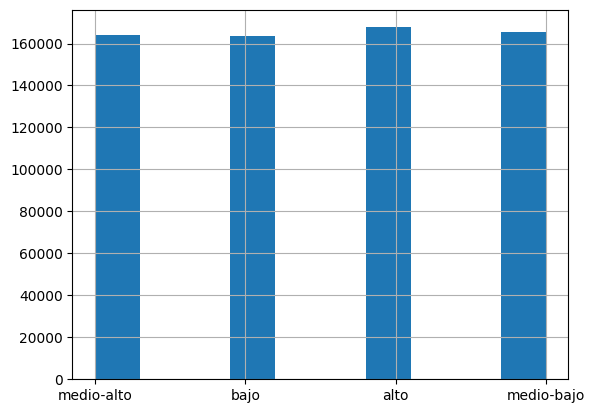

In [ ]:
z.RENDIMIENTO_GLOBAL.hist()

## Convertir la columna objetivo (predicción) en valores discretos


In [ ]:
y_col = 'RENDIMIENTO_GLOBAL'

rmap = {'alto': 3, 'bajo':0, 'medio-bajo':1, 'medio-alto':2}
z[y_col] = z[y_col].replace(rmap)
z.head()

,ID,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,FAMI_EDUCACIONPADRE,FAMI_EDUCACIONMADRE,RENDIMIENTO_GLOBAL,PRGA_acuicultura,PRGA_administracin,...,DEP_QUINDIO,DEP_RISARALDA,DEP_SANTANDER,DEP_SAN_ANDRES,DEP_SUCRE,DEP_TOLIMA,DEP_VALLE,DEP_VAUPES,PAGOMATRICULAPROPIO_No,PAGOMATRICULAPROPIO_Si
0,904256,6.0,1.0,3.0,1.0,1.0,1.0,2,False,False,...,False,False,False,False,False,False,False,False,True,False
1,645256,4.0,0.0,3.0,0.0,1.0,1.0,0,False,False,...,False,False,False,False,False,False,False,False,True,False
2,308367,4.0,4.0,3.0,1.0,1.0,1.0,0,False,False,...,False,False,False,False,False,False,False,False,True,False
3,470353,5.0,0.0,4.0,1.0,0.0,1.0,3,False,False,...,False,False,True,False,False,False,False,False,True,False
4,989032,4.0,3.0,3.0,1.0,0.0,0.0,1,False,False,...,False,False,False,False,False,False,False,False,True,False


# Analisis

In [ ]:
z.dtypes.value_counts()

,count
bool,159
float64,6
int64,2


# Preprocesamientos



*   Normalización.
$$z=\frac{X-max(x)}{min(x)}$$
*   Estandarización.

$$z=\frac{X-media(x)}{devestad(x)}$$



# Selección de caracteristicas



*   Selección Basada en la varianza


```
from sklearn.feature_selection import VarianceThreshold

# Eliminar características con varianza menor a un umbral
selector = VarianceThreshold(threshold=0.1)
X_selected = selector.fit_transform(X)
```



*   Selección Basada en la Correlacion


```
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Calcular la matriz de correlación
corr_matrix = np.corrcoef(X.T)

# Visualizar la matriz de correlación
sns.heatmap(corr_matrix, annot=True)
plt.show()

```

* Selección Basada en la importacia del modelo
  * Arboles de Decisión


  ```
  from sklearn.ensemble import RandomForestClassifier

  # Entrenar el modelo de Random Forest
  model = RandomForestClassifier()
  model.fit(X_train, y_train)

  # Extraer la importancia de cada característica
  importances = model.feature_importances_

  # Visualizar las características más importantes
  feature_names = df.columns
  sorted_indices = np.argsort(importances)[::-1]
  plt.bar(range(X.shape[1]), importances[sorted_indices])
  plt.xticks(range(X.shape[1]), feature_names[sorted_indices], rotation=90)
  plt.show()
  ```


  * Random Forest
  * Gradient Boosting
  * XGBoost


```
from xgboost import XGBClassifier
from xgboost import plot_importance

# Entrenar el modelo XGBoost
xgb = XGBClassifier()
xgb.fit(X_train, y_train)

# Mostrar la importancia de las características
plot_importance(xgb)
plt.show()
```



* RFE(Metodos recursivos de eliminación)


```
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

# Crear un modelo base
model = LogisticRegression()

# Inicializar RFE con el modelo
selector = RFE(estimator=model, n_features_to_select=5, step=1)
selector = selector.fit(X_train, y_train)

# Obtener las características seleccionadas
X_selected = selector.transform(X_train)

```

* Y faltan...




